In [1]:
!pip install pydotplus

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
data=pd.read_csv('breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,0
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,0
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,0
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,0
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,0


In [5]:
data.isnull().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.dtypes

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

In [8]:
data.nunique()

mean_radius                456
mean_texture               479
mean_perimeter             522
mean_area                  539
mean_smoothness            474
mean_compactness           537
mean_concavity             537
mean_concave_points        542
mean_symmetry              432
mean_fractal_dimension     499
radius_error               540
texture_error              519
perimeter_error            533
area_error                 528
smoothness_error           547
compactness_error          541
concavity_error            533
concave_points_error       507
symmetry_error             498
fractal_dimension_error    545
worst_radius               457
worst_texture              511
worst_perimeter            514
worst_area                 544
worst_smoothness           411
worst_compactness          529
worst_concavity            539
worst_concave_points       492
worst_symmetry             500
worst_fractal_dimension    535
target                       2
dtype: int64

In [9]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
564,21.560000,22.390000,142.000000,1479.000000,0.111000,0.115900,0.243900,0.138900,0.172600,0.056230,1.176000,1.256000,7.673000,158.700000,0.010300,0.028910,0.051980,0.024540,0.011140,0.004239,25.450000,26.400000,166.100000,2027.000000,0.141000,0.211300,0.410700,0.221600,0.206000,0.071150,0
565,20.130000,28.250000,131.200000,1261.000000,0.097800,0.103400,0.144000,0.097910,0.175200,0.055330,0.765500,2.463000,5.203000,99.040000,0.005769,0.024230,0.039500,0.016780,0.018980,0.002498,23.690000,38.250000,155.000000,1731.000000,0.116600,0.192200,0.321500,0.162800,0.257200,0.066370,0
566,16.600000,28.080000,108.300000,858.100000,0.084550,0.102300,0.092510,0.053020,0.159000,0.056480,0.456400,1.075000,3.425000,48.550000,0.005903,0.037310,0.047300,0.015570,0.013180,0.003892,18.980000,34.120000,126.700000,1124.000000,0.113900,0.309400,0.340300,0.141800,0.221800,0.078200,0
567,20.600000,29.330000,140.100000,1265.000000,0.117800,0.277000,0.351400,0.152000,0.239700,0.070160,0.726000,1.595000,5.772000,86.220000,0.006522,0.061580,0.071170,0.016640,0.023240,0.006185,25.740000,39.420000,184.600000,1821.000000,0.165000,0.868100,0.938700,0.265000,0.408700,0.124000,0
568,7.760000,24.540000,47.920000,181.000000,0.052630,0.043620,0.000000,0.000000,0.158700,0.058840,0.385700,1.428000,2.548000,19.150000,0.007189,0.004660,0.000000,0.000000,0.026760,0.002783,9.456000,30.370000,59.160000,268.600000,0.089960,0.064440,0.000000,0.000000,0.287100,0.070390,1


In [11]:
data.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
62,14.250000,22.150000,96.420000,645.700000,0.104900,0.200800,0.213500,0.086530,0.194900,0.072920,0.703600,1.268000,5.373000,60.780000,0.009407,0.070560,0.068990,0.018480,0.017000,0.006113,17.670000,29.510000,119.100000,959.500000,0.164000,0.624700,0.692200,0.178500,0.284400,0.113200,0
50,11.760000,21.600000,74.720000,427.900000,0.086370,0.049660,0.016570,0.011150,0.149500,0.058880,0.406200,1.210000,2.635000,28.470000,0.005857,0.009758,0.011680,0.007445,0.024060,0.001769,12.980000,25.720000,82.980000,516.500000,0.108500,0.086150,0.055230,0.037150,0.243300,0.065630,1
116,8.950000,15.760000,58.740000,245.200000,0.094620,0.124300,0.092630,0.023080,0.130500,0.071630,0.313200,0.978900,3.280000,16.940000,0.018350,0.067600,0.092630,0.023080,0.023840,0.005601,9.414000,17.070000,63.340000,270.000000,0.117900,0.187900,0.154400,0.038460,0.165200,0.077220,1
40,13.440000,21.580000,86.180000,563.000000,0.081620,0.060310,0.031100,0.020310,0.178400,0.055870,0.238500,0.826500,1.572000,20.530000,0.003280,0.011020,0.013900,0.006881,0.013800,0.001286,15.930000,30.250000,102.500000,787.900000,0.109400,0.204300,0.208500,0.111200,0.299400,0.071460,0
31,11.840000,18.700000,77.930000,440.600000,0.110900,0.151600,0.121800,0.051820,0.230100,0.077990,0.482500,1.030000,3.475000,41.000000,0.005551,0.034140,0.042050,0.010440,0.022730,0.005667,16.820000,28.120000,119.400000,888.700000,0.163700,0.577500,0.695600,0.154600,0.476100,0.140200,0


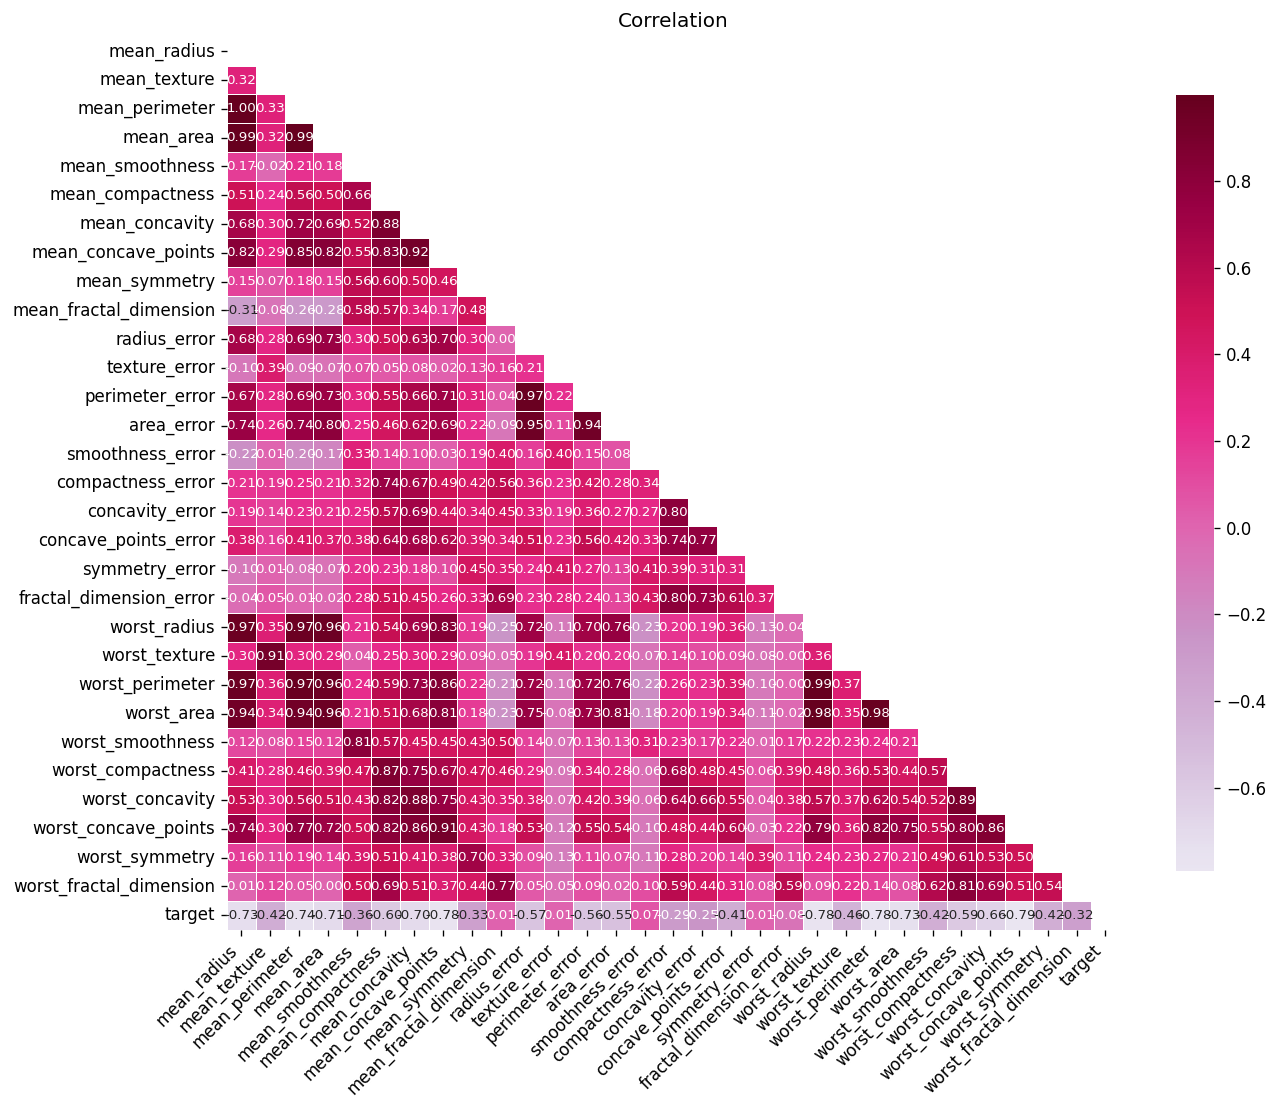

In [12]:
# Corelation of the data

# Set figure size and DPI
plt.figure(figsize=(12, 12), dpi=120)

# Compute correlation matrix
corr = data.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Customize the color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap='PuRd', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7},
            fmt=".2f", annot_kws={"fontsize": 8})

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set title
plt.title('Correlation', fontsize=12)

# Display the plot
plt.show()

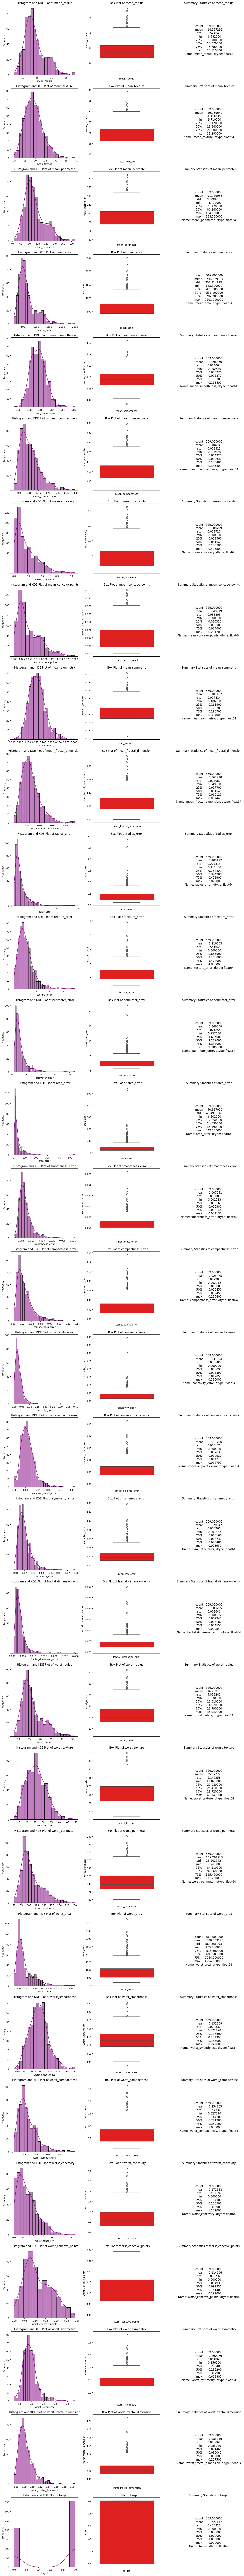

In [13]:
def analyze_univariate(data):
    """
    Perform univariate analysis on each column in the DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame.

    Returns:
        None
    """
    num_cols = len(data.columns)
    fig, axes = plt.subplots(num_cols, 3, figsize=(15, num_cols*5))
    plt.subplots_adjust(hspace=0.5)

    # Iterate over each column in the DataFrame
    for i, column in enumerate(data.columns):
        # Perform univariate analysis for the column
        univariate_analysis(data, column, axes[i])

    plt.tight_layout()
    plt.show()


def univariate_analysis(data, column, axes):
    """
    Perform univariate analysis on a single column of the DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame.
        column (str): The name of the column to analyze.
        axes (matplotlib.axes._subplots.AxesSubplot): The axes to plot the analysis.

    Returns:
        None
    """
    # Summary statistics
    stats = data[column].describe()

    # Histogram with KDE
    sns.histplot(data=data, x=column, kde=True,
                 color='purple', edgecolor='black', ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Histogram and KDE Plot of " + column)

    # Box plot
    sns.boxplot(data=data, y=column, color='red', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_title("Box Plot of " + column)

    # Summary statistics text
    axes[2].text(0.5, 0.5, str(stats), fontsize=12, ha='center', va='center')
    axes[2].axis('off')
    axes[2].set_title("Summary Statistics of " + column)


analyze_univariate(data)


In [14]:
list(data)

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target']

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [16]:
X = data.drop(labels=['target'],axis=1)
Y = data[['target']]

In [17]:
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [18]:
numerical_cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

numerical_cols

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
# Custom Transformer to change numerical values to float16
class Float16Transformer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.astype(np.float16)

# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('float16_transformer', Float16Transformer()),  # Custom transformer to change values to float16
        ('scaler', RobustScaler())
    ]
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numerical_cols)
    ]
)


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [21]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [22]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
100,13.610000,24.980000,88.050000,582.700000,0.094880,0.085110,0.086250,0.044890,0.160900,0.058710,0.456500,1.290000,2.861000,43.140000,0.005872,0.014880,0.026470,0.009921,0.014650,0.002355,16.990000,35.270000,108.600000,906.500000,0.126500,0.194300,0.316900,0.118400,0.265100,0.073970
398,11.060000,14.830000,70.310000,378.200000,0.077410,0.047680,0.027120,0.007246,0.153500,0.062140,0.185500,0.688100,1.263000,12.980000,0.004259,0.014690,0.019400,0.004168,0.011910,0.003537,12.680000,20.350000,80.790000,496.700000,0.112000,0.187900,0.207900,0.055560,0.259000,0.091580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
419,11.160000,21.410000,70.950000,380.300000,0.101800,0.059780,0.008955,0.010760,0.161500,0.061440,0.286500,1.678000,1.968000,18.990000,0.006908,0.009442,0.006972,0.006159,0.026940,0.002060,12.360000,28.920000,79.260000,458.000000,0.128200,0.110800,0.035820,0.043060,0.297600,0.071230
41,10.950000,21.350000,71.900000,371.100000,0.122700,0.121800,0.104400,0.056690,0.189500,0.068700,0.236600,1.428000,1.822000,16.970000,0.008064,0.017640,0.025950,0.010370,0.013570,0.003040,12.840000,35.340000,87.220000,514.000000,0.190900,0.269800,0.402300,0.142400,0.296400,0.096060


In [23]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    model.fit(X_train, Y_train)  # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy = accuracy_score(Y_test, Y_test_pred)
    precision = precision_score(Y_test, Y_test_pred)
    recall = recall_score(Y_test, Y_test_pred)
    f1 = f1_score(Y_test, Y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_score(Y_train, Y_train_pred)))
    print("- Precision: {:.4f}".format(precision_score(Y_train, Y_train_pred)))
    print("- Recall: {:.4f}".format(recall_score(Y_train, Y_train_pred)))
    print("- F1-Score: {:.4f}".format(f1_score(Y_train, Y_train_pred)))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1-Score: {:.4f}".format(f1))

    print('=' * 35)
    print('\n')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

Logistic Regression
Model performance for Training set
- Accuracy: 0.9899
- Precision: 0.9841
- Recall: 1.0000
- F1-Score: 0.9920
----------------------------------
Model performance for Test set
- Accuracy: 0.9942
- Precision: 0.9909
- Recall: 1.0000
- F1-Score: 0.9954


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9298
- Precision: 0.9533
- Recall: 0.9358
- F1-Score: 0.9444


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9649
- Precision: 0.9640
- Recall: 0.9817
- F1-Score: 0.9727


AdaBoost
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set
- Accura

In [25]:
model_f1_scores = pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1-Score'])
model_f1_scores = model_f1_scores.sort_values(by='F1-Score', ascending=False)

In [26]:
model_f1_scores

,Model Name,F1-Score
0,Logistic Regression,0.995434
2,Random Forest,0.972727
4,K-Nearest Neighbors,0.972727
3,AdaBoost,0.968037
1,Decision Tree,0.944444


In [27]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Accuracy on training set: {:.2%}".format(train_accuracy))
print("Accuracy on test set: {:.2%}".format(test_accuracy))


Accuracy on training set: 97.49%
Accuracy on test set: 96.49%


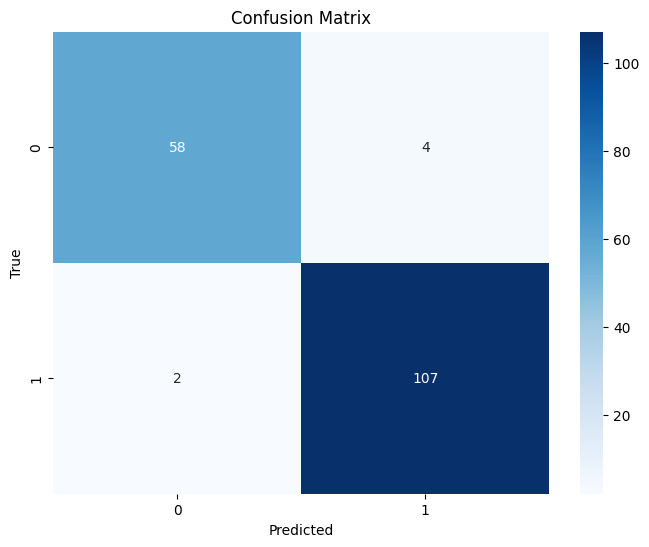

In [28]:
# Compute confusion matrix for test set
cm = confusion_matrix(Y_test, Y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

# Create the LogisticRegression object
log_model = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(log_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
Y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy of the model is %.2f" % accuracy)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Accuracy of the model is 98.83
Best hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
from sklearn.model_selection import cross_val_score
# Define the models to train
models = [
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print("Training", model_name)

    # Create the pipeline with the preprocessor and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation and calculate the mean F1-score
    scores = cross_val_score(pipeline, X, Y, cv=5, scoring='f1')
    mean_score = scores.mean()

    print("Mean F1-score:", mean_score)
    print("-" * 30)

Training LogisticRegression
Mean F1-score: 0.9846129101592919
------------------------------


In [31]:
model.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [32]:
import joblib
joblib.dump(model, 'breast_cancer_model.pkl')
print("Model saved successfully!")


Model saved successfully!
